I have downloaded the AF_scores and RF2_PPI scores with the OmicsMSA used.

In here we want to see: 

1. whether the chemokine receptors we have can be found in their dataset.
2. based on their scorews whether they interact or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.tri import Triangulation

RF_path = "./RF_scores"
RF_chemo_scores= "./RF_chemo_scores"

AF_path = "./AF_scores"
AF_chemo_scores = "./AF_chemo_scores"

In [9]:
star_positions = [(0,0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 8), (0, 9), (0, 10), (0, 11), (0, 13), (0, 18), (0, 27),
                  (1, 1), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 11), (1, 19), (1, 21), 
                  (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 10), (2, 13), (2, 19), (2, 21), (2, 23), (2, 32), (2, 33), (2, 34), 
                  (3, 2), (3, 4), (3, 12), (3, 17), 
                  (4, 1), (4, 2), (4, 3), (4, 4) ,(4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 11), (4, 12),
                  (5, 15),
                  (6, 14), (6, 16),
                  (7, 0), (7, 6), (7, 11), (7, 12), (7, 13),
                  (8, 20), 
                  (9, 22), (9, 23), 
                  (10, 24), (10, 28), (10, 29), (10, 30), (10, 31), 
                  (11, 24), (11, 25), (11, 26), (11, 27), (11, 28), (11, 29), (11, 30), (11, 31), 
                  (12, 4), (12, 5), (12, 7), (12, 8), (12, 14), (12, 15), (12, 27), (12, 32), (12, 33), (12, 34), (12, 35), (12, 36), 
                  (13, 35), (13, 37), 
                  (14, 2), (14, 3), (14, 4), (14, 11), (14, 36), 
                  (15, 38), (15, 39), 
                  (16, 40), 
                  (17, 41), (17, 42), 
                  (18, 1), (18, 4), (18, 5), (18, 7), (18, 8), (18, 9), (18, 12), (18, 24), (18, 28), (18, 29), (18, 31), (18, 34), 
                  (19, 0), (19, 1), (19, 2), (19, 3), (19, 4), (19, 5), (19, 6), (19, 7), (19, 8), (19, 9), (19, 12), (19, 17), 
                  (20, 34), (20, 35), 
                  (21, 1), (21, 5), (21, 6), (21, 8), (21, 14), (21, 16), (21, 20), (21, 36), 
                  (22, 14)]




dict_chemo = {
    "P22362": "CCL1",
    "P13500": "CCL2",
    "P10147": "CCL3",
    "P13236": "CCL4",
    "P13501": "CCL5",
    "P80098": "CCL7",
    "P80075": "CCL8",
    "P51671": "CCL11",
    "Q99616": "CCL13",
    "Q16627": "CCL14",
    "Q16663": "CCL15",
    "O15467": "CCL16",
    "Q92583": "CCL17",
    "P55774": "CCL18",
    "Q99731": "CCL19",
    "P78556": "CCL20",
    "O00585": "CCL21",
    "O00626": "CCL22",
    "P55773": "CCL23",
    "O00175": "CCL24",
    "O15444": "CCL25",
    "Q9Y258": "CCL26",
    "Q9Y4X3": "CCL27",
    "Q9NRJ3": "CCL28",
    "P09341": "CXCL1",
    "P19875": "CXCL2",
    "P19876": "CXCL3",
    "P02776": "CXCL4",
    "P42830": "CXCL5",
    "P80162": "CXCL6",
    "P02775": "CXCL7",
    "P10145": "CXCL8",
    "Q07325": "CXCL9",
    "P02778": "CXCL10",
    "O14625": "CXCL11",
    "P48061": "CXCL12",
    "O43927": "CXCL13",
    "O95715": "CXCL14",
    "Q9H2A7": "CXCL16",
    "Q6UXB2": "CXCL17",
    "P78423": "CX3CL1",
    "P47992": "XCL1",
    "Q9UBD3": "XCL2",
}

# The receptors
dict_recep={
    "Q5U003": "CCR1",
    "P41597": "CCR2",
    "P51677": "CCR3",
    "P51679": "CCR4",
    "P51681": "CCR5",
    "P51684": "CCR6",
    "P32248": "CCR7",
    "P51685": "CCR8",
    "P51686": "CCR9",
    "P46092": "CCR10",
    "P25024": "CXCR1",
    "P25025": "CXCR2",
    "P49682": "CXCR3",
    "P61073": "CXCR4",
    "P32302": "CXCR5",
    "O00574": "CXCR6",
    "P49238": "CX3CR1",
    "P46094": "XCR1",
    "Q16570": "ACKR1",
    "O00590": "ACKR2",
    "P25106": "ACKR3",
    "Q9NPB9": "ACKR4",
    "O00421": "CCRL2",
}


In [3]:

with open(RF_path, "r") as f:
    lines = f.readlines()


valid_prefixes = set(f"{R}_{C}" for R in dict_recep for C in dict_chemo)
valid_prefixes.update(f"{C}_{R}" for R in dict_recep for C in dict_chemo)  # Add reverse pairs


with open(RF_chemo_scores, "w") as file:
    for line in lines:
        prefix = line.split()[0]  
        if prefix in valid_prefixes:
            file.write(line)
            



In [4]:

with open(AF_path, "r") as f:
    lines = f.readlines()


valid_prefixes = set(f"{R}_{C}" for R in dict_recep for C in dict_chemo)
valid_prefixes.update(f"{C}_{R}" for R in dict_recep for C in dict_chemo)  # Add reverse pairs


with open(AF_chemo_scores, "w") as file:
    for line in lines:
        prefix = line.split()[0]  
        if prefix in valid_prefixes:
            file.write(line)

In [5]:
RF_scores_dict = {}

with open(RF_chemo_scores, "r") as f:
    lines = f.readlines()
    for l in lines:
        print(l.split())

['P32302_Q9H2A7', '0.1498']
['P51684_Q9H2A7', '0.2262']
['P61073_Q9H2A7', '0.1436']
['P46092_Q9H2A7', '0.3918']
['P51686_Q9H2A7', '0.1534']
['P32248_Q9H2A7', '0.0924']
['P51679_Q9H2A7', '0.11804']
['O00574_Q9H2A7', '0.9604']
['P25024_Q9H2A7', '0.204']
['O00421_Q9H2A7', '0.06647']
['P25025_Q9H2A7', '0.3179']
['P51681_Q9H2A7', '0.4897']
['P51677_Q9H2A7', '0.1703']
['P51685_Q9H2A7', '0.176']
['P49238_Q9H2A7', '0.2424']
['P41597_Q9H2A7', '0.01567']
['P46094_Q9H2A7', '0.0961']
['Q16570_Q9H2A7', '0.11035']
['P32302_Q9Y4X3', '0.03946']
['O15444_P32302', '0.07385']
['O95715_P32302', '0.08984']
['P22362_P32302', '0.3572']
['P32302_Q9NRJ3', '0.00558']
['P32302_Q99731', '0.0291']
['P02778_P32302', '0.02843']
['P32302_P78556', '0.05368']
['P19875_P32302', '0.0066']
['P02778_P25106', '0.0211']
['P32302_Q07325', '0.02542']
['O14625_P32302', '0.02759']
['O14625_P25106', '0.02206']
['P10145_P32302', '0.01139']
['P32302_Q99616', '0.008095']
['P32302_P51671', '0.014084']
['P32302_P42830', '0.012726']
['

In [6]:
AF_scores_dict = {}

with open(AF_chemo_scores, "r") as f:
    lines = f.readlines()
    for l in lines:
        p1 = l.split()[0].split("_", 1)[0]
        p2 = l.split()[0].split("_", 1)[1]

        # Corrected conditions
        if p1 in dict_recep.keys() and p2 in dict_chemo.keys():
            genep1 = dict_recep[p1]
            genep2 = dict_chemo[p2]
            AF_scores_dict[(genep1, genep2)] = l.split()[1]
        elif p1 in dict_chemo.keys() and p2 in dict_recep.keys():
            genep1 = dict_chemo[p1]
            genep2 = dict_recep[p2]
            # The receptors come first
            AF_scores_dict[(genep2, genep1)] = l.split()[1]
        else:
            pass

print(AF_scores_dict)


{('CXCR5', 'CXCL16'): '0.10724', ('CCR6', 'CXCL16'): '0.2886', ('CXCR4', 'CXCL16'): '0.0905', ('CCR9', 'CXCL16'): '0.1718', ('CCR7', 'CXCL16'): '0.0826', ('CCR10', 'CXCL16'): '0.2241', ('CXCR6', 'CXCL16'): '0.986', ('CCR4', 'CXCL16'): '0.0488', ('CXCR1', 'CXCL16'): '0.2064', ('CXCR2', 'CXCL16'): '0.04587', ('CCRL2', 'CXCL16'): '0.1716', ('CCR3', 'CXCL16'): '0.1202', ('CCR8', 'CXCL16'): '0.2512', ('CCR5', 'CXCL16'): '0.1467', ('CX3CR1', 'CXCL16'): '0.10834', ('CCR2', 'CXCL16'): '0.0977', ('XCR1', 'CXCL16'): '0.1274', ('ACKR1', 'CXCL16'): '0.05707', ('CXCR5', 'CCL27'): '0.1941', ('CXCR5', 'CCL25'): '0.06192', ('CXCR5', 'CXCL14'): '0.03943', ('CXCR5', 'CCL1'): '0.02153', ('CXCR5', 'CCL28'): '0.008415', ('CXCR5', 'CCL20'): '0.08746', ('CXCR5', 'CXCL10'): '0.02937', ('ACKR3', 'CXCL10'): '0.03436', ('CXCR5', 'CXCL2'): '0.004723', ('CXCR5', 'CCL19'): '0.02657', ('CXCR5', 'CXCL9'): '0.004368', ('ACKR3', 'CXCL11'): '0.0278', ('CXCR5', 'CXCL8'): '0.02472', ('CXCR5', 'CXCL11'): '0.003607', ('CXCR

In [7]:
RF_scores_dict = {}

with open(RF_chemo_scores, "r") as f:
    lines = f.readlines()
    for l in lines:
        p1 = l.split()[0].split("_", 1)[0]
        p2 = l.split()[0].split("_", 1)[1]

        # Corrected conditions
        if p1 in dict_recep.keys() and p2 in dict_chemo.keys():
            genep1 = dict_recep[p1]
            genep2 = dict_chemo[p2]
            RF_scores_dict[(genep1, genep2)] = l.split()[1]
        elif p1 in dict_chemo.keys() and p2 in dict_recep.keys():
            genep1 = dict_chemo[p1]
            genep2 = dict_recep[p2]
            # The receptors come first
            RF_scores_dict[(genep2, genep1)] = l.split()[1]
        else:
            pass




print(RF_scores_dict)

{('CXCR5', 'CXCL16'): '0.1498', ('CCR6', 'CXCL16'): '0.2262', ('CXCR4', 'CXCL16'): '0.1436', ('CCR10', 'CXCL16'): '0.3918', ('CCR9', 'CXCL16'): '0.1534', ('CCR7', 'CXCL16'): '0.0924', ('CCR4', 'CXCL16'): '0.11804', ('CXCR6', 'CXCL16'): '0.9604', ('CXCR1', 'CXCL16'): '0.204', ('CCRL2', 'CXCL16'): '0.06647', ('CXCR2', 'CXCL16'): '0.3179', ('CCR5', 'CXCL16'): '0.4897', ('CCR3', 'CXCL16'): '0.1703', ('CCR8', 'CXCL16'): '0.176', ('CX3CR1', 'CXCL16'): '0.2424', ('CCR2', 'CXCL16'): '0.01567', ('XCR1', 'CXCL16'): '0.0961', ('ACKR1', 'CXCL16'): '0.11035', ('CXCR5', 'CCL27'): '0.03946', ('CXCR5', 'CCL25'): '0.07385', ('CXCR5', 'CXCL14'): '0.08984', ('CXCR5', 'CCL1'): '0.3572', ('CXCR5', 'CCL28'): '0.00558', ('CXCR5', 'CCL19'): '0.0291', ('CXCR5', 'CXCL10'): '0.02843', ('CXCR5', 'CCL20'): '0.05368', ('CXCR5', 'CXCL2'): '0.0066', ('ACKR3', 'CXCL10'): '0.0211', ('CXCR5', 'CXCL9'): '0.02542', ('CXCR5', 'CXCL11'): '0.02759', ('ACKR3', 'CXCL11'): '0.02206', ('CXCR5', 'CXCL8'): '0.01139', ('CXCR5', 'CC

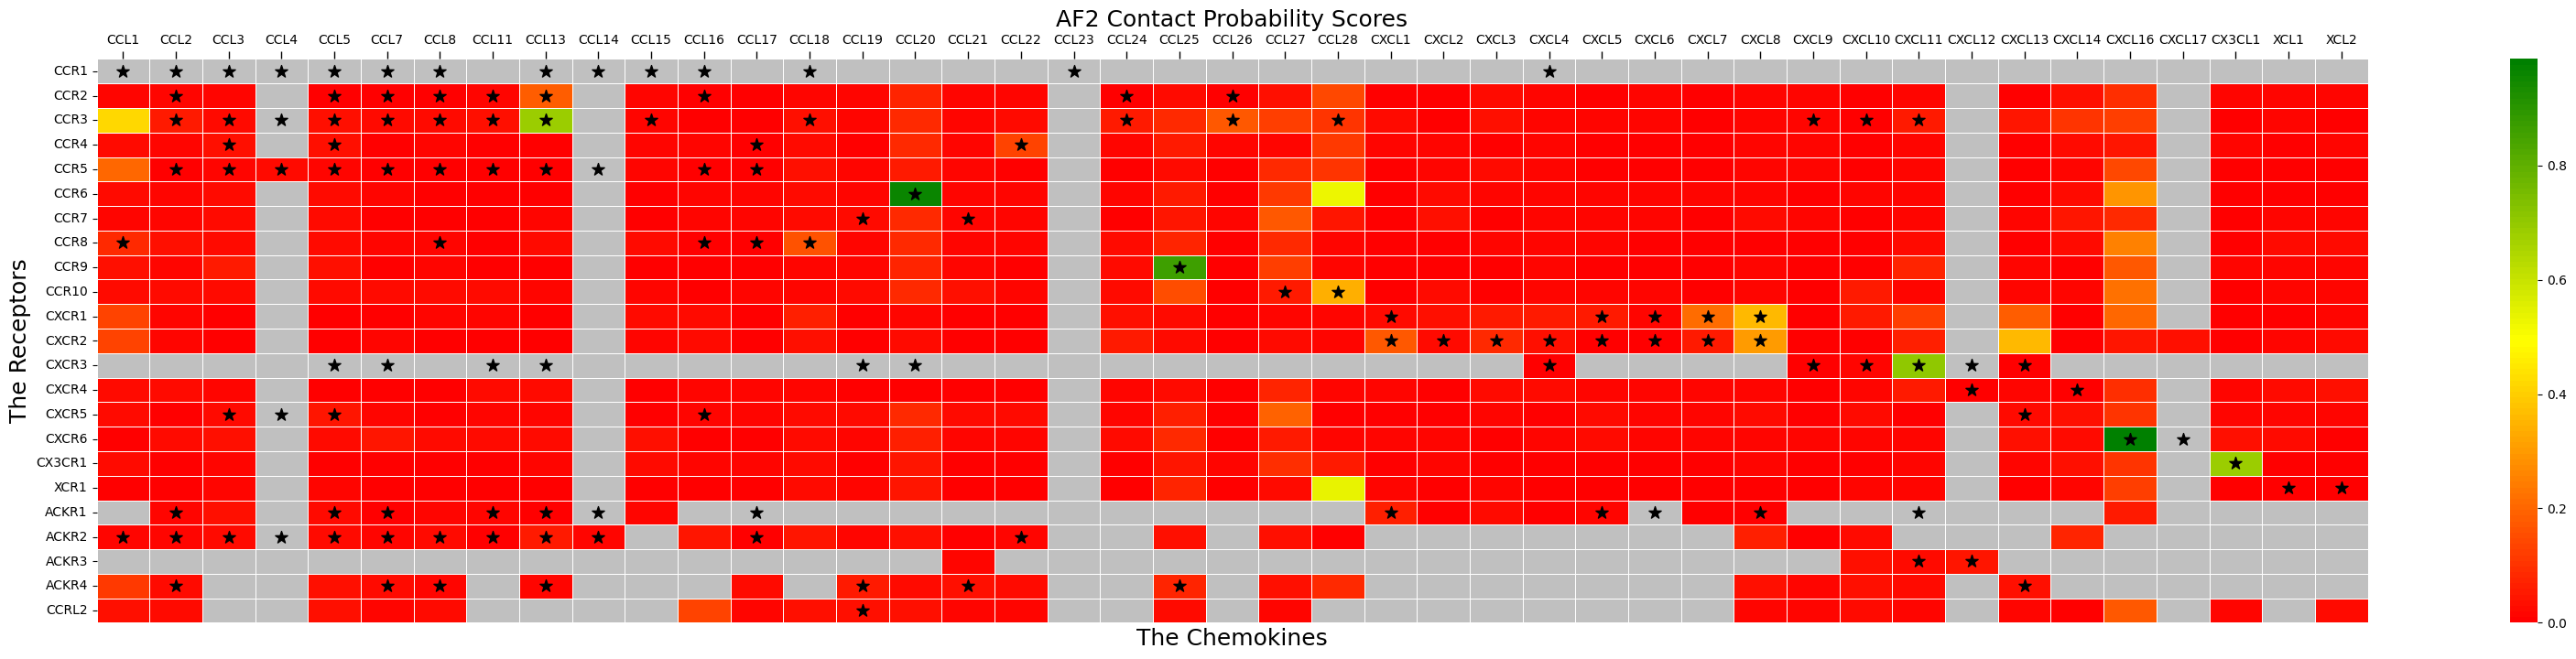

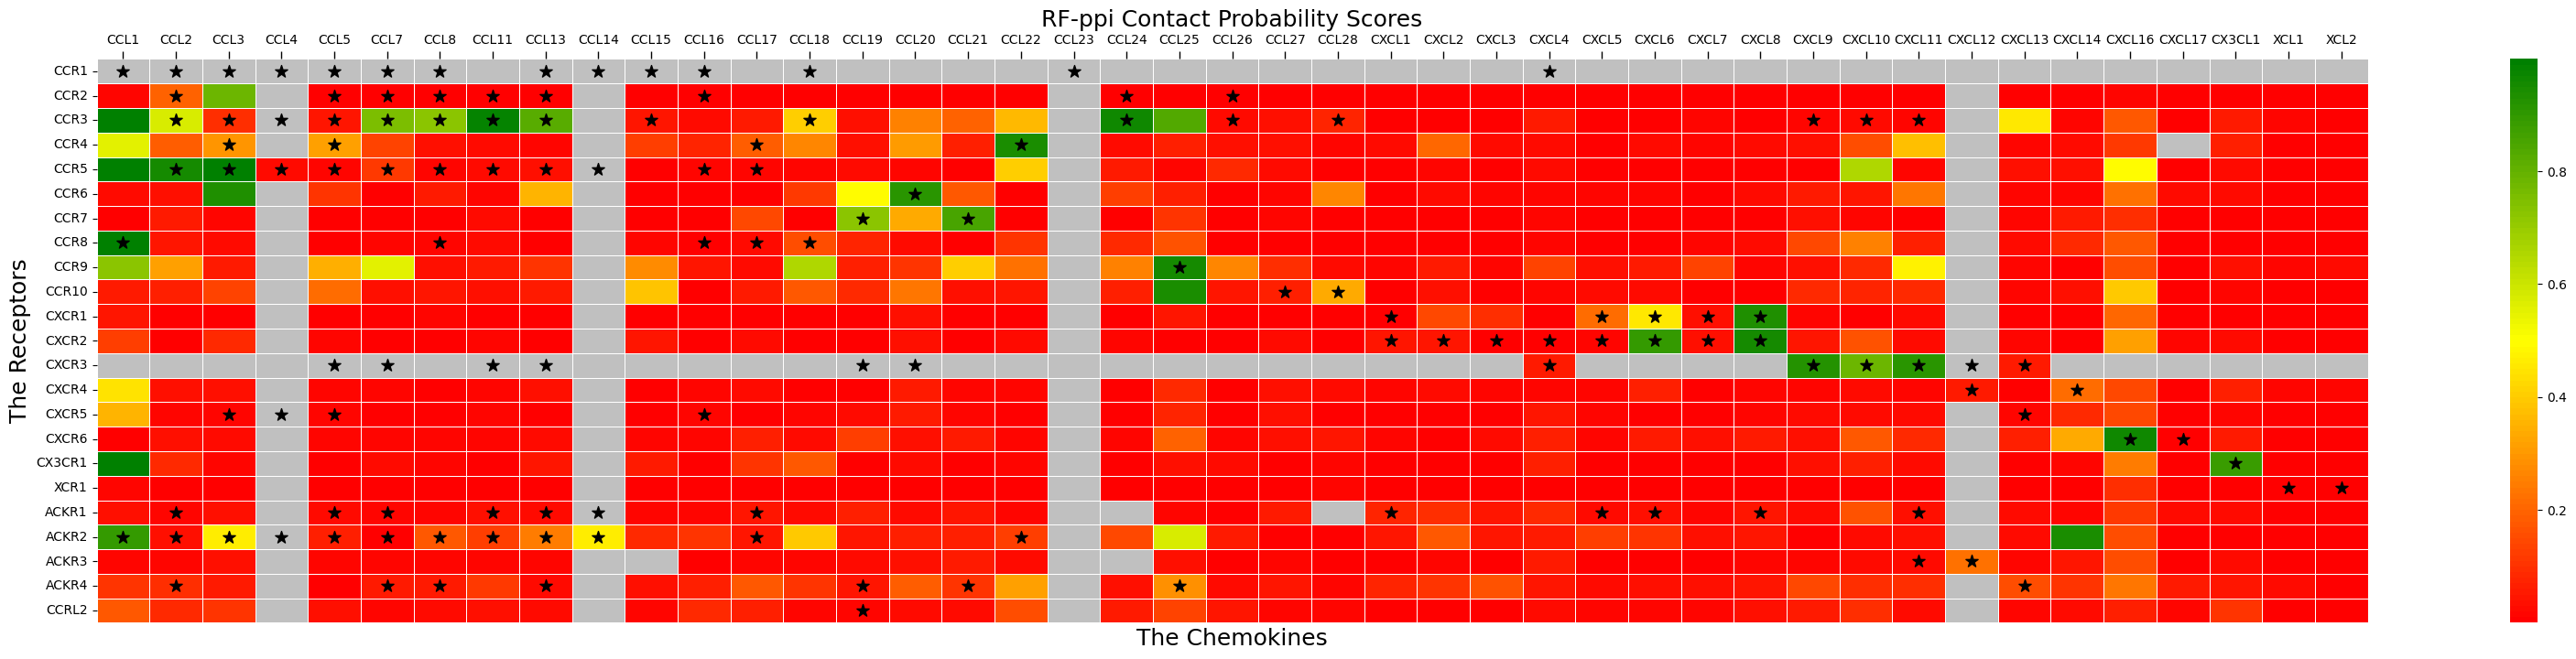

In [10]:
def plot_heatmap(scores_dict, r_dict, c_dict, model_name, star_positions = star_positions):
    row = len(r_dict)
    col = len(c_dict)

    mat= np.zeros((row, col))

    for i, r in enumerate(r_dict.values()):
        for j, c in enumerate(c_dict.values()):
            if (r, c) in scores_dict.keys():
                mat[i, j] = scores_dict[(r, c)]
            elif (c, r) in scores_dict.keys():
                mat[i, j] = scores_dict[(c, r)]
            else:
                # these values don't exist in their database
                mat[i, j] = np.nan # I want this values to be black
    heatmap_df = pd.DataFrame(mat, index= dict_recep.values(), columns=dict_chemo.values())
    plt.figure(figsize=(40, 8))
    colors = ["red", "yellow", "green"]
    n_bins = 100 
    cmap = LinearSegmentedColormap.from_list("red_yellow_green", colors, N=n_bins)
    cmap.set_bad("silver")
    sns.heatmap(heatmap_df, annot=False, cmap=cmap, fmt=".8f", linewidths=0.7)
    for row, col in star_positions:
        row = row + 0.5
        col = col + 0.5
        plt.scatter(col, row,s = 100, marker = '*', color = "black")

    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().tick_params(axis='x', bottom=False, top=True, grid_alpha = 1, length=6, width=1)
    plt.title(f'{model_name} Contact Probability Scores', fontsize = 18)
    plt.xlabel("The Chemokines", fontsize = 18)
    plt.ylabel("The Receptors", fontsize = 18)
    plt.show()


plot_heatmap(AF_scores_dict, dict_recep, dict_chemo, "AF2")

plot_heatmap(RF_scores_dict, dict_recep, dict_chemo, "RF-ppi")

    
    
    



# whats next?

* I need to run the models both with AF and RF-ppi with the omics on the grey areas to see how they perform.
* I need to get the structural prediction and in Pymol put them side by side. Maybe the interaction in terms of location is correct but they are not interacting.
* I need to put together the outputs for the normal MSAs and the outputs from omics MSA and compare for the chemokines. (does Albert have them)
